Consider the following system of ordinary differential equations:

dA/dt = -a*A(t)
dB/dt = a*A(t)-b*B(t)
dC/dt = b*B(t)

with initial conditions A(0) = 1, B(0) = 0, and C(0) = 0 and where a and b are positive constants.

This can be thought of as a system where a collection of people start in state A, flow to state B at a given per-capita rate a per day, and flow from state B to C at the per-capita rate b per day.


## 1. 	Write a function that takes as an input the parameters a and b and returns the time series of the solution to the equations above for the state B at times 0.0, 1.0, 2.0, … 100.0 (i.e. in unit time increments of 1.0 from 0.0 to 100.0). 

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint,solve_ivp
from scipy.optimize import minimize

In [2]:
def ivp(state,t,a,b):
    """
    System of ODEs
    
    Parameters:
    t -> time increments
    couple -> initial conditions
    a, b -> input parameters
    """    
    # Ordinary Differential Equations
    dAdt = -a*state[0]
    dBdt = a*state[0] - b*state[1]
    dCdt = b*state[1]
    
    # Return the ODEs output
    return np.array([dAdt, dBdt,dCdt])

In [3]:
# Input variables, initial conditions, for the function coupled_ode
A0 = 1
B0 = 0
C0 = 0
a, b = 0.25, 0.15
state0 = [A0,B0,C0]
increm = np.linspace(0,1,100)

In [4]:
# Evaluate the ODEs at the time increments
res = odeint(ivp,state0 ,increm, args=(a,b))
state_B = res.T[1]

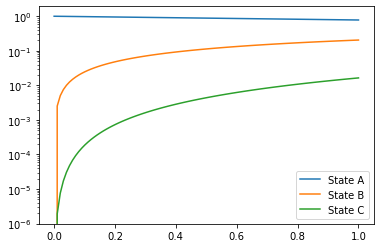

In [5]:
plt.semilogy(increm,res.T[0],label="State A")
plt.semilogy(increm,res.T[1], label="State B")
plt.semilogy(increm,res.T[2], label="State C")
plt.legend()
plt.show()

## 2. Using the same language as above, read in the observations from the “ode_fitting_data.csv” file for the compartment B. Write a function that takes as an input a time series of values for B at times 0.0, 1.0, … 100.0 and returns the sum of squares of the differences in the values


In [6]:
ode_df = pd.read_csv('ode_fitting_data.csv')
ode_df.head(10)

,time,B_obs
0,0,0.001517
1,1,0.042594
2,2,0.092344
3,3,0.124060
4,4,0.159859
5,5,0.177095
6,6,0.183038
7,7,0.206611
8,8,0.234267
9,9,0.243497


In [7]:
observed_B = ode_df.loc[1:,"B_obs"]

In [8]:
def sse(arr):
    """
    Calculated 
    pred:  values calculated used odeint
    observed:  values from ode_fitting_data.csv
    errorSum:  Predicted Values - Observed Values
    errorSumSquared: (Predicted Values - Observed Values) ** 2
    np.sum(errorSumSquared):  The sum of squared errors
    """
    pred = arr[0]
    observed = arr[1]
    errorSum = arr[0] - arr[1]
    errorSumSquared = errorSum**2
    return np.sum(errorSumSquared)

In [9]:
arr = [state_B,observed_B]

In [10]:
squaredError = sse(arr)
print("Sum of Squares: ",squaredError)

Sum of Squares:  1.990061719445149


## 	3. Using the same coding language as above and the solutions to parts 1 and 2, find the values of the parameters a and b that minimize the squared error difference between the observations in the “ode_fitting_data.csv” file and the time series of values of B for the corresponding solution to the ODE. 


In [11]:
def func(x):
    state0 = [A0,B0,C0]
    increm = np.linspace(0,1,100)
    a, b = x[0], x[1]
    res = odeint(ivp,state0 ,increm, args=(a,b))
    pred = res.T[1]
    arr = [pred,observed_B]
    return sse(arr)

In [12]:
x = np.array([0.25,0.15])
func(x)

1.990061719445149

In [13]:
res = minimize(func,x,method='BFGS')

In [14]:
res

      fun: 0.010324238628559052
 hess_inv: array([[27.58682053,  7.49239706],
       [ 7.49239706, 35.07103033]])
      jac: array([-3.97651456e-06,  2.96579674e-06])
  message: 'Optimization terminated successfully.'
     nfev: 84
      nit: 21
     njev: 28
   status: 0
  success: True
        x: array([ 5.34923615, 10.12944074])

In [18]:
x = np.array([5.34923615, 10.12944074])
func(x)

0.010324238628583903